In [1]:
import CommChannel as CC
import numpy as np

In [2]:
qBase = [0, 0]
nPL = 4.2  
kPL = -40

decorrSH = 3.09    
alpha = 8.41
sigmaSH = np.sqrt(alpha)
psdAtFC = 30

lam = 0.125
kRic = 10
decorrMP = 0.4*lam         
corrMP = 1
sigmaMP = 3
cp = CC.ChannelParams(qBase, nPL, kPL, sigmaSH, decorrSH, decorrMP, lam,
                      kRic, corrMP, psdAtFC, sigmaMP)

In [3]:
x_max = 13.56
x_min = -2.5
y_max = 1.5
y_min = -15.36
region = [x_max, x_min, y_max, y_min]

res = 2/decorrMP
cc = CC.CommChannel(cp, region, res)
cc.generateSH();cc.generateMP(2);

Generating shadowing...
Shadowing generation complete.
Generating MP...
MP generation complete.


In [5]:
print(decorrMP)

0.05


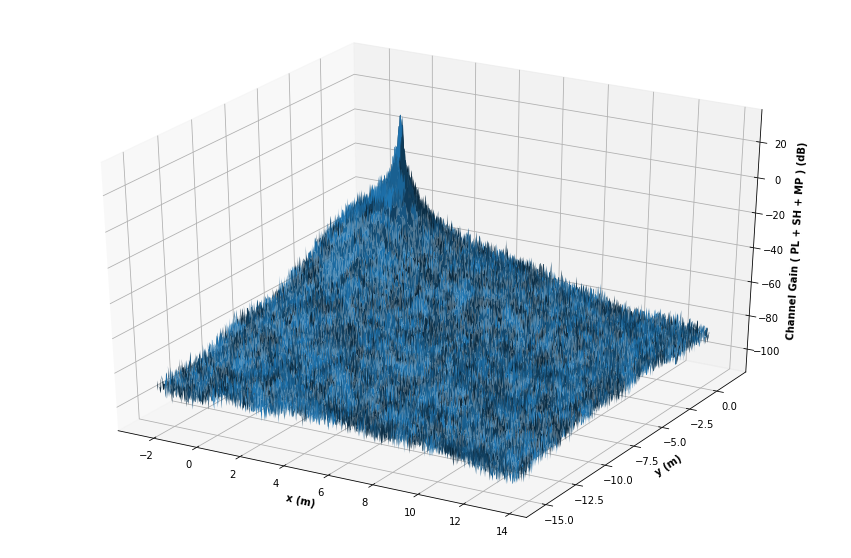

40.0


In [4]:
cc.plot_channel(7)

In [5]:
xs, vals = cc.sampleChannel(500)

In [6]:
pc = CC.PredictedChannel(cp, region, res, xs, vals)

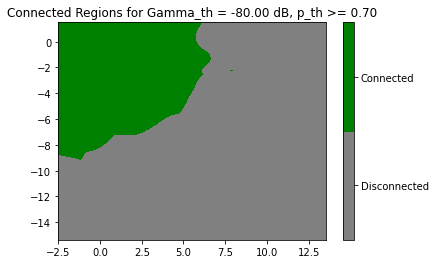

In [7]:
pc.plotConnectivityField(0.7, -80)

In [13]:
qBase2 = [10, -12]
kPL2 = -35

cp2 = CC.ChannelParams(qBase2, nPL, kPL2, sigmaSH, decorrSH, decorrMP, lam,
                      kRic, corrMP, psdAtFC, sigmaMP)

cc2 = CC.CommChannel(cp2, region, res)
cc2.generateSH();cc2.generateMP(1);

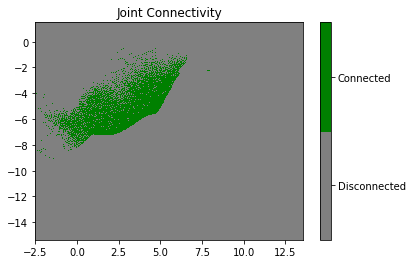

In [14]:
cf2 = cc2.getConnectionField(-80)
cf1 = pc.getConnectionField(0.7, -80)
cf = cf1*cf2
CC.plotConnectionField(region, cf, 'Joint Connectivity')

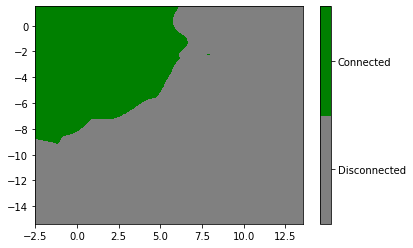

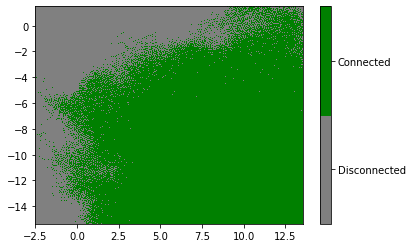

In [15]:
CC.plotConnectionField(region, cf1, '')
CC.plotConnectionField(region, cf2, '')